In [ ]:
import pandas as pd
import numpy as np

In [ ]:
'''
데이터: Year-End Hot 100 Songs
출처: https://www.kaggle.com/rakannimer/billboard-lyrics
'''

In [ ]:
# 곡 장르찾기
# https://www.allmusic.com/search 에서 검색 처리

In [ ]:
rawdata=pd.read_csv('data/billboard_lyrics_1964-2015.csv', encoding='latin')

In [ ]:
rawdata = pd.DataFrame(rawdata)

In [ ]:
rawdata.head()

In [ ]:
# 장르 검색을 위한 검색어 만들기
genre_keyword=[]
for n in range(len(rawdata)):
    tmp = rawdata['Song'][n]+' '+rawdata['Artist'][n]
    genre_keyword.append(tmp)
genre_keyword[:10]

In [ ]:
# https://www.allmusic.com/search/all/take%20a%20bow%20rihanna 이런식으로 검색된다

In [ ]:
genre_keyword=[n.replace(' ','%20') for n in genre_keyword]

In [ ]:
genre_keyword[:10]

In [ ]:
artists=rawdata['Artist']

In [ ]:
target_site='https://www.allmusic.com/search/all/'

In [ ]:
from selenium import webdriver as wd
import urllib

In [ ]:
# 웹드라이버 가동
driver=wd.Chrome('./tool/chromedriver_75.0.3770.140.exe')

In [ ]:
len(genre_keyword)

In [ ]:
import time
# 사이트 접속해서 장르 추출
results=[]
for i in range(len(genre_keyword)):
    try:
        target_url = target_site+genre_keyword[i]
        driver.get(target_url)
        time.sleep(3)
        keywords=driver.find_element_by_class_name('genres').text
#         print(keywords)
        results.append(keywords)
    except Exception as e:
#         print(e)
        keywords=None
        results.append(keywords)
results[:10]

In [ ]:
len(results)

In [ ]:
rawdata['Genres']=results

In [ ]:
# 장르 데이터 소실되기전에 저장
rawdata.to_csv('./data/raw_with_genres.xls', encoding='latin')

In [ ]:
driver.close()
driver.quit()

In [ ]:
import sys
sys.exit

In [ ]:
rawdata=pd.read_csv('./data/raw_with_genres.xls', encoding='latin')

In [ ]:
rawdata[:20]

In [ ]:
genres=[]
for data in rawdata['Genres']:
    try:
        tmp=data.split(',')[0]
        genres.append(tmp)
    except Exception as e:
        tmp=data
        genres.append(tmp)
genres[:20]

In [ ]:
rawdata['Genres_sorted']=genres

In [ ]:
rawdata[:20]

In [ ]:
# none갯수
sum_numbers=0
for number in rawdata['Genres_sorted'].value_counts():
    sum_numbers+=number
len(genres)-sum_numbers

In [ ]:
genres2=[]
for data in rawdata['Genres']:
    try:
        tmp=data.split(',')[1]
        genres2.append(tmp)
    except Exception as e:
        tmp=None
        genres2.append(tmp)
genres2[:20]

In [ ]:
genres2=='Pop/Rock'

In [ ]:
g_tf=[]
for word in genres2:
    try:
        tmp= 'Pop/Rock' in word
        g_tf.append(tmp)
    except Exception as e:
        tmp = False
        g_tf.append(tmp)

In [163]:
# 차트의 상위 8개 장르 확인
rawdata['Genres_sorted'].value_counts()[:8].index

Index(['Pop/Rock', 'R&B', 'Rap', 'Country', 'Electronic', 'Jazz',
       'Easy Listening', 'Vocal'],
      dtype='object')

In [164]:
# 차트 상위 8개 장르 추출
idx=['Pop/Rock', 'R&B', 'Rap', 'Country', 'Electronic', 'Jazz', 'Easy Listening', 'Vocal']

In [ ]:
rawdata.shape

In [106]:
# 년도별 차트에 올라간 장르 횟수 생성
rawdata['cnt'] = rawdata['Rank'].apply( lambda x:1)

In [102]:
# 피벗 테이블로 년도별 정리
frequency=rawdata.pivot_table(index=['Year'],columns=['Genres_sorted'], values=['cnt'],aggfunc=[np.sum])

In [113]:
# 데이터 정리를 위한 과정
frequency=frequency['sum']

In [118]:
# 데이터 정리를 위한 과정
frequency=frequency['cnt']

In [166]:
# 데이터 정리를 위한 과정
frequency=frequency[idx]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

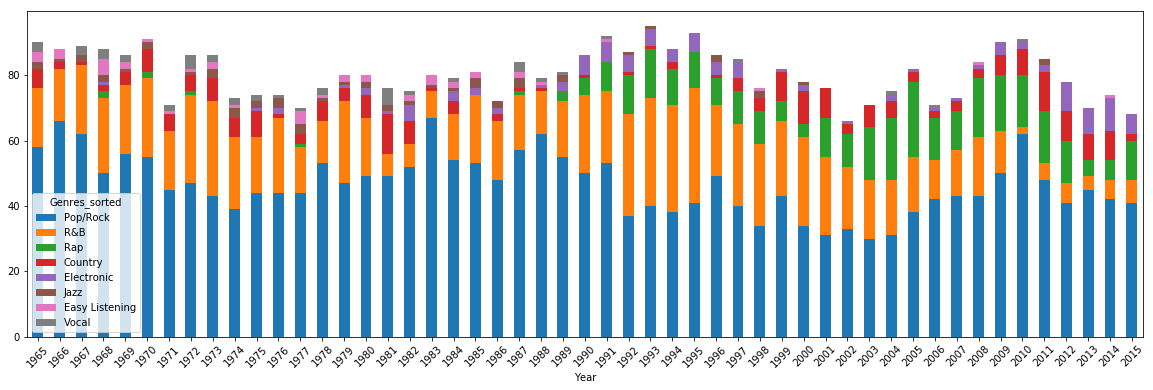

In [182]:
# 누적 막대 그래프 생성
plt.figure()
frequency.plot(kind='bar', stacked=True, rot=45, figsize=(20,6))
plt.show()